In [ ]:
# Using this notebook for lab 6 & lab 7 & final round for Week 3

In [4]:
import pandas as pd
import numpy as np
import math

data = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')
                   
                 

In [5]:
#show the shape

data.shape

(9134, 24)

In [6]:
#standardize header names
data.columns


Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [8]:
def columns_to_upper (table):
    table.columns = list(map(lambda x: x.upper(), table.columns))
    return table

In [9]:
data = columns_to_upper(data)
data.head()

,CUSTOMER,STATE,CUSTOMER LIFETIME VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE TO DATE,EMPLOYMENTSTATUS,GENDER,INCOME,...,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,TOTAL CLAIM AMOUNT,VEHICLE CLASS,VEHICLE SIZE
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [10]:
# remove spaces 

def remove_column_spaces(table):
    #Changes blank spaces into underscores for the names of the columns in "table"
    table.columns = list(map(lambda x: x.replace(" ","_"), table.columns))
    return table

In [11]:
data = remove_column_spaces(data)
data.head()

,CUSTOMER,STATE,CUSTOMER_LIFETIME_VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,INCOME,...,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,TOTAL_CLAIM_AMOUNT,VEHICLE_CLASS,VEHICLE_SIZE
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [12]:
data = data.rename(columns={'EMPLOYMENTSTATUS': 'EMPLOYMENT_STATUS'})
data.head()

,CUSTOMER,STATE,CUSTOMER_LIFETIME_VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENT_STATUS,GENDER,INCOME,...,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,TOTAL_CLAIM_AMOUNT,VEHICLE_CLASS,VEHICLE_SIZE
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [13]:
#numerical columns 
data._get_numeric_data().columns

Index(['CUSTOMER_LIFETIME_VALUE', 'INCOME', 'MONTHLY_PREMIUM_AUTO',
       'MONTHS_SINCE_LAST_CLAIM', 'MONTHS_SINCE_POLICY_INCEPTION',
       'NUMBER_OF_OPEN_COMPLAINTS', 'NUMBER_OF_POLICIES',
       'TOTAL_CLAIM_AMOUNT'],
      dtype='object')

In [14]:
#categorical columns
data.select_dtypes(include=['object']).columns


Index(['CUSTOMER', 'STATE', 'RESPONSE', 'COVERAGE', 'EDUCATION',
       'EFFECTIVE_TO_DATE', 'EMPLOYMENT_STATUS', 'GENDER', 'LOCATION_CODE',
       'MARITAL_STATUS', 'POLICY_TYPE', 'POLICY', 'RENEW_OFFER_TYPE',
       'SALES_CHANNEL', 'VEHICLE_CLASS', 'VEHICLE_SIZE'],
      dtype='object')

In [15]:
#check null values

data.isna().sum()

CUSTOMER                         0
STATE                            0
CUSTOMER_LIFETIME_VALUE          0
RESPONSE                         0
COVERAGE                         0
EDUCATION                        0
EFFECTIVE_TO_DATE                0
EMPLOYMENT_STATUS                0
GENDER                           0
INCOME                           0
LOCATION_CODE                    0
MARITAL_STATUS                   0
MONTHLY_PREMIUM_AUTO             0
MONTHS_SINCE_LAST_CLAIM          0
MONTHS_SINCE_POLICY_INCEPTION    0
NUMBER_OF_OPEN_COMPLAINTS        0
NUMBER_OF_POLICIES               0
POLICY_TYPE                      0
POLICY                           0
RENEW_OFFER_TYPE                 0
SALES_CHANNEL                    0
TOTAL_CLAIM_AMOUNT               0
VEHICLE_CLASS                    0
VEHICLE_SIZE                     0
dtype: int64

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [18]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CUSTOMER                       9134 non-null   object 
 1   STATE                          9134 non-null   object 
 2   CUSTOMER_LIFETIME_VALUE        9134 non-null   float64
 3   RESPONSE                       9134 non-null   object 
 4   COVERAGE                       9134 non-null   object 
 5   EDUCATION                      9134 non-null   object 
 6   EFFECTIVE_TO_DATE              9134 non-null   object 
 7   EMPLOYMENT_STATUS              9134 non-null   object 
 8   GENDER                         9134 non-null   object 
 9   INCOME                         9134 non-null   int64  
 10  LOCATION_CODE                  9134 non-null   object 
 11  MARITAL_STATUS                 9134 non-null   object 
 12  MONTHLY_PREMIUM_AUTO           9134 non-null   i

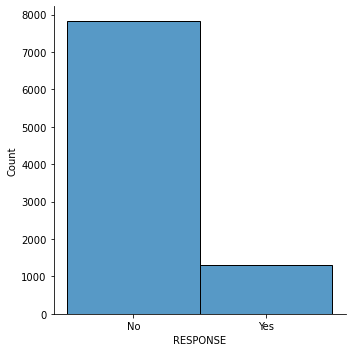

In [19]:
# no of responses

sns.displot(data["RESPONSE"])
plt.show()

In [20]:
table = data.groupby(['SALES_CHANNEL', 'RESPONSE']).size()
display(table)

type(table)

SALES_CHANNEL  RESPONSE
Agent          No          2811
               Yes          666
Branch         No          2273
               Yes          294
Call Center    No          1573
               Yes          192
Web            No          1169
               Yes          156
dtype: int64

pandas.core.series.Series

In [21]:
def find_rates(table): 
    #Finds the rate of one value against the other in a Series object created using groupby
    #Those values should be YES or NO
    rates = []
    for i in range(1, len(table), 2):
        rates.append((table[i]/(table[i]+table[i-1]))*100)
    return rates

In [24]:
# plot rates

rate_list = find_rates(table)
rate_list

[19.15444348576359, 11.453058044409817, 10.878186968838527, 11.773584905660377]

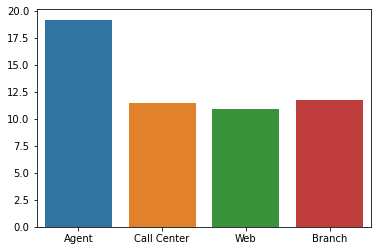

In [25]:
sns.barplot(x=data['SALES_CHANNEL'].unique(), y=rate_list)
plt.show()

In [29]:
categorical = data.select_dtypes(include=['object'])
categorical.dtypes

CUSTOMER             object
STATE                object
RESPONSE             object
COVERAGE             object
EDUCATION            object
EFFECTIVE_TO_DATE    object
EMPLOYMENT_STATUS    object
GENDER               object
LOCATION_CODE        object
MARITAL_STATUS       object
POLICY_TYPE          object
POLICY               object
RENEW_OFFER_TYPE     object
SALES_CHANNEL        object
VEHICLE_CLASS        object
VEHICLE_SIZE         object
dtype: object

In [27]:

numerical = data._get_numeric_data()
numerical.dtypes

CUSTOMER_LIFETIME_VALUE          float64
INCOME                             int64
MONTHLY_PREMIUM_AUTO               int64
MONTHS_SINCE_LAST_CLAIM            int64
MONTHS_SINCE_POLICY_INCEPTION      int64
NUMBER_OF_OPEN_COMPLAINTS          int64
NUMBER_OF_POLICIES                 int64
TOTAL_CLAIM_AMOUNT               float64
dtype: object

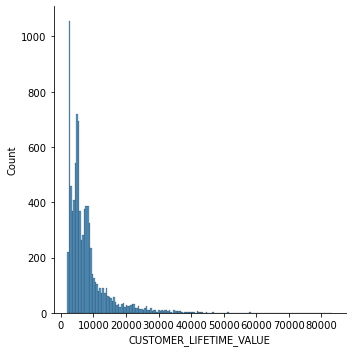

In [28]:
# use seaborn

sns.displot(numerical['CUSTOMER_LIFETIME_VALUE'])

In [31]:
def distributions(table):
    #Plots a displot for each column in a table
    #All those columns must be numerical
    for name in table.columns:
        sns.displot(table[name])
        plt.show()

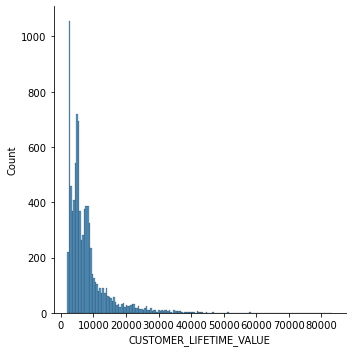

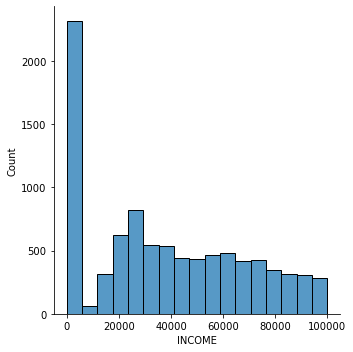

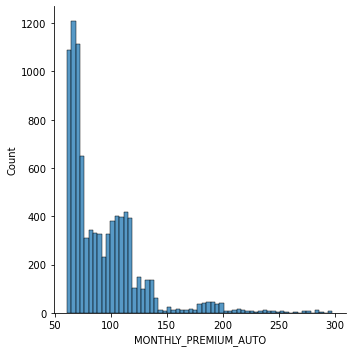

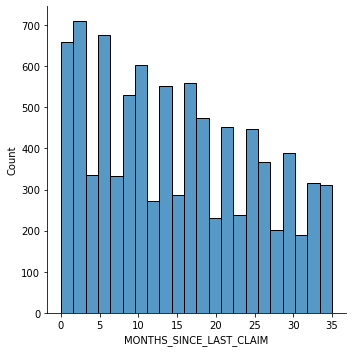

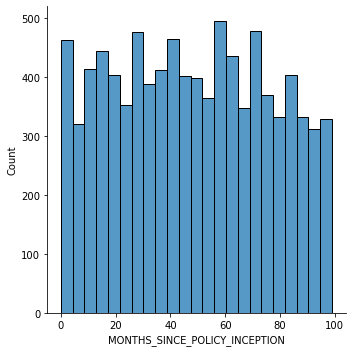

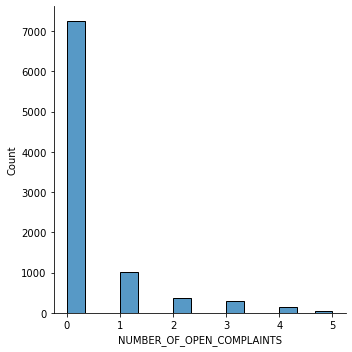

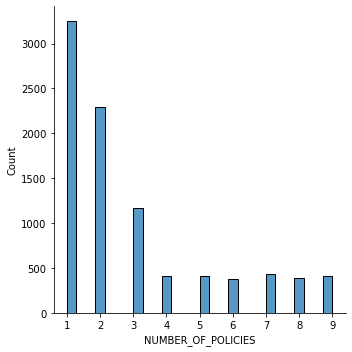

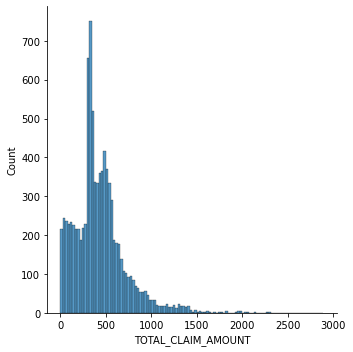

In [32]:
#check numerical distributions

distributions(numerical)

In [34]:
def histograms(table):
    #Plots a histogram for each column in a table
    #All those columns must be numerical
    for name in table.columns:
        plt.hist(table[name])
        plt.show()
        print(name)

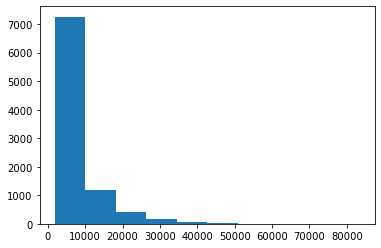

CUSTOMER_LIFETIME_VALUE


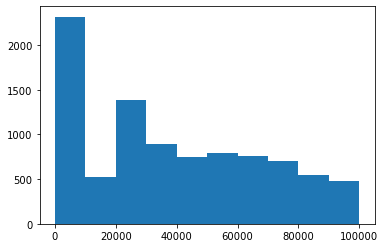

INCOME


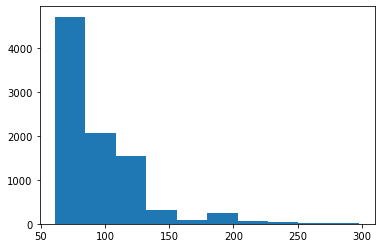

MONTHLY_PREMIUM_AUTO


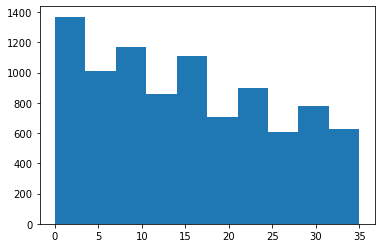

MONTHS_SINCE_LAST_CLAIM


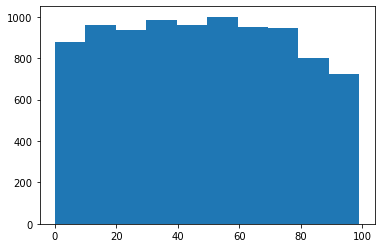

MONTHS_SINCE_POLICY_INCEPTION


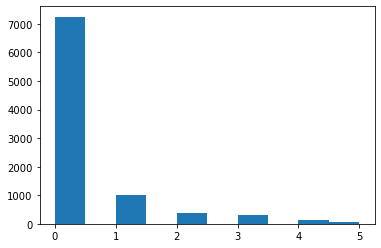

NUMBER_OF_OPEN_COMPLAINTS


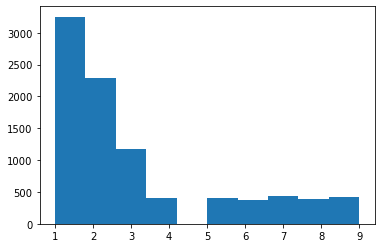

NUMBER_OF_POLICIES


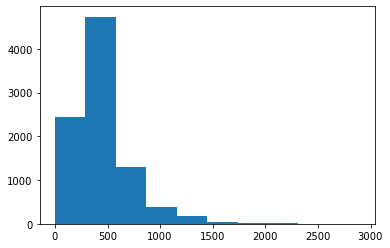

TOTAL_CLAIM_AMOUNT


In [35]:
#plot historgrams

histograms(numerical)


In [40]:
 #Plots a correlations heatmap for a table
    #All the values must be numerical

def corr_heatmap(table):
    correlations_matrix = table.corr()
    sns.heatmap(correlations_matrix, annot=True)
    plt.show()

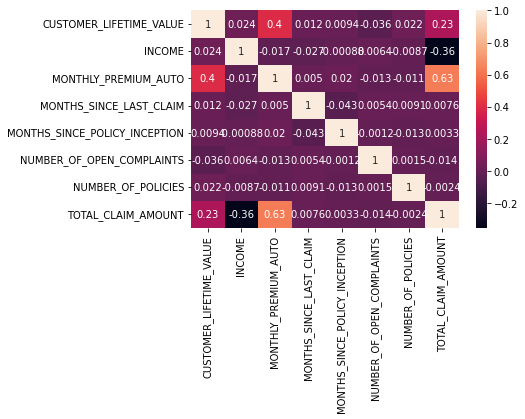

In [41]:
corr_heatmap(numerical)


In [ ]:
# Processing Data 
# X-y split.
# Normalize (numerical)

In [43]:
y = numerical['TOTAL_CLAIM_AMOUNT']
X = numerical.drop(['TOTAL_CLAIM_AMOUNT'], axis=1)
display(y)
X

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: TOTAL_CLAIM_AMOUNT, Length: 9134, dtype: float64

,CUSTOMER_LIFETIME_VALUE,INCOME,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


In [44]:
# Normalize with minmax scaler 

from sklearn.preprocessing import MinMaxScaler


In [45]:
transformer = MinMaxScaler().fit(X)
x_normalized = transformer.transform(X)

numerical_normalized = pd.DataFrame(x_normalized, columns=X.columns)
numerical_normalized

,CUSTOMER_LIFETIME_VALUE,INCOME,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000
...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250


In [47]:
# encode categoricals 

categorical

from sklearn.preprocessing import OneHotEncoder


In [48]:
categorical_OH = categorical[['STATE','GENDER','LOCATION_CODE', 'MARITAL_STATUS', 'POLICY','SALES_CHANNEL', 'VEHICLE_CLASS']].copy()
categorical_label = categorical[['RESPONSE', 'COVERAGE', 'EDUCATION', 'EMPLOYMENT_STATUS', 'RENEW_OFFER_TYPE', 'VEHICLE_SIZE']].copy()

In [49]:
encoder = OneHotEncoder().fit(categorical_OH)
encoded_for_p = encoder.transform(categorical_OH).toarray()

encoder.categories_
cols = [colname for row in encoder.categories_ for colname in row]

onehot_table = pd.DataFrame(encoded_for_p, columns=cols)
cols_to_drop = [row[0] for row in encoder.categories_]

onehot_table = onehot_table.drop(cols_to_drop,axis=1)
onehot_table

,California,Nevada,Oregon,Washington,M,Suburban,Urban,Married,Single,Corporate L2,...,Special L2,Special L3,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9130,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9131,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9132,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
from sklearn.preprocessing import LabelEncoder


In [52]:
label_table = categorical_label.copy()


label_table = label_table.apply(LabelEncoder().fit_transform)
label_table

,RESPONSE,COVERAGE,EDUCATION,EMPLOYMENT_STATUS,RENEW_OFFER_TYPE,VEHICLE_SIZE
0,0,0,0,1,0,1
1,0,1,0,4,2,1
2,0,2,0,1,0,1
3,0,0,0,4,0,1
4,0,0,0,1,0,1
...,...,...,...,...,...,...
9129,0,0,0,1,1,1
9130,1,1,1,1,0,1
9131,0,1,0,4,0,1
9132,0,1,1,1,2,0


In [53]:
#merging the frames

categorical_encoded = pd.concat([onehot_table,label_table], axis=1)
categorical_encoded

,California,Nevada,Oregon,Washington,M,Suburban,Urban,Married,Single,Corporate L2,...,Luxury SUV,SUV,Sports Car,Two-Door Car,RESPONSE,COVERAGE,EDUCATION,EMPLOYMENT_STATUS,RENEW_OFFER_TYPE,VEHICLE_SIZE
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,0,0,1,0,1
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,4,2,1
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,2,0,1,0,1
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0,0,0,4,0,1
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,1,1,1
9130,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,1,1,1,0,1
9131,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0,1,0,4,0,1
9132,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,1,1,2,0


In [54]:
final_table = pd.concat([numerical_normalized, categorical_encoded], axis=1)
final_table

,CUSTOMER_LIFETIME_VALUE,INCOME,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,California,Nevada,Oregon,...,Luxury SUV,SUV,Sports Car,Two-Door Car,RESPONSE,COVERAGE,EDUCATION,EMPLOYMENT_STATUS,RENEW_OFFER_TYPE,VEHICLE_SIZE
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,0,0,1,0,1
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,4,2,1
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0,2,0,1,0,1
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0,0,0,4,0,1
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,1,1,1
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,1,1,1,0,1
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,4,0,1
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,1,1,2,0


In [55]:
#Linear Regression

In [56]:
#Train test split 

from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(final_table, y, test_size=0.2, random_state=42)

In [58]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [62]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [63]:
# find the metrics 

def metrics(X, y):
    predictions = lm.predict(X)
    r2 = r2_score(y, predictions)
    print('R2:', r2)
    mse = np.sqrt(mean_squared_error(y,predictions))
    print('MSE:', mse)
    rmse = math.sqrt(mse)
    print('RMSE:', rmse)
    mae = mean_absolute_error(y, predictions)
    print('MAE:', mae)
    

In [64]:
metrics(X_test,y_test)

R2: 0.7607986405441841
MSE: 137.90993090993373
RMSE: 11.7435059036871
MAE: 95.22811203821902
